In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/karen_building_blocks_analysis'

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.visualization import plot_3Dscatter_pca, plot_scatter_pca, plot_cumulative_explained_variance, biplot_PCA

In [3]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../data/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

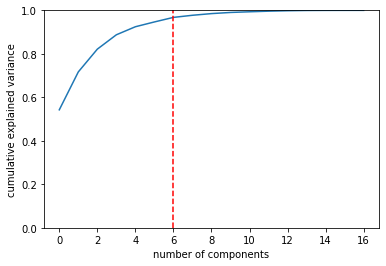

In [4]:
plot_cumulative_explained_variance(pca.explained_variance_ratio_)

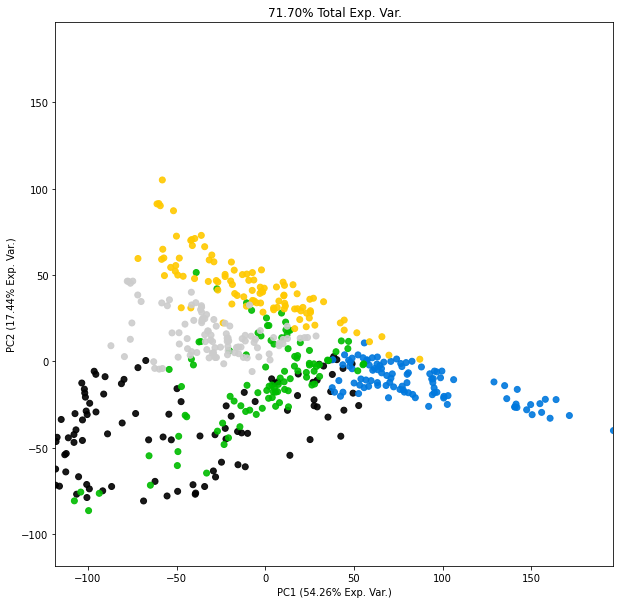

In [5]:
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patients_ids)

In [8]:
print(pca.components_[0:2, :].T.shape)
print(np.sqrt(pca.explained_variance_[0:2]).shape)

(17, 2)
(2,)


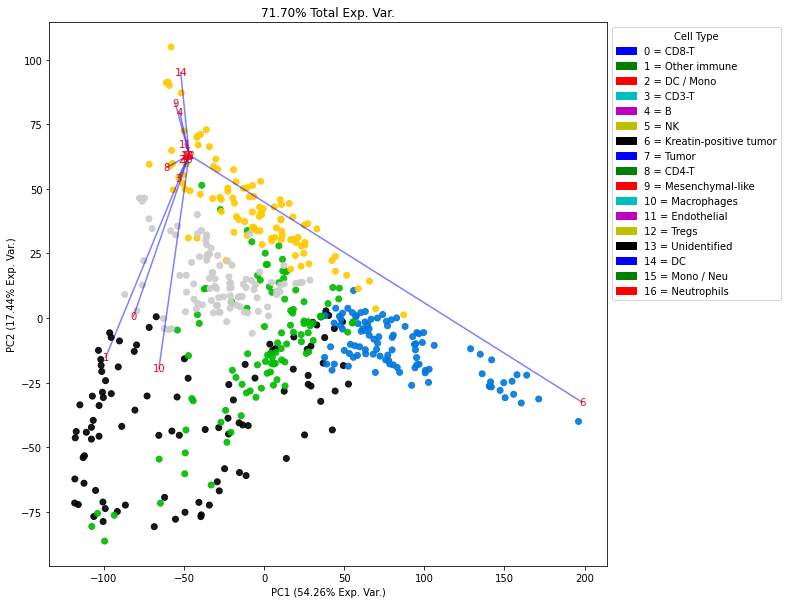

In [6]:
#Original Axis generator
original_axis = np.zeros((18, 17))
np.fill_diagonal(original_axis, np.array(sites).max(0))
original_axis_pc = pca.transform(original_axis)
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patients_ids, original_axis=original_axis_pc, cell_type=CELL_TYPES)

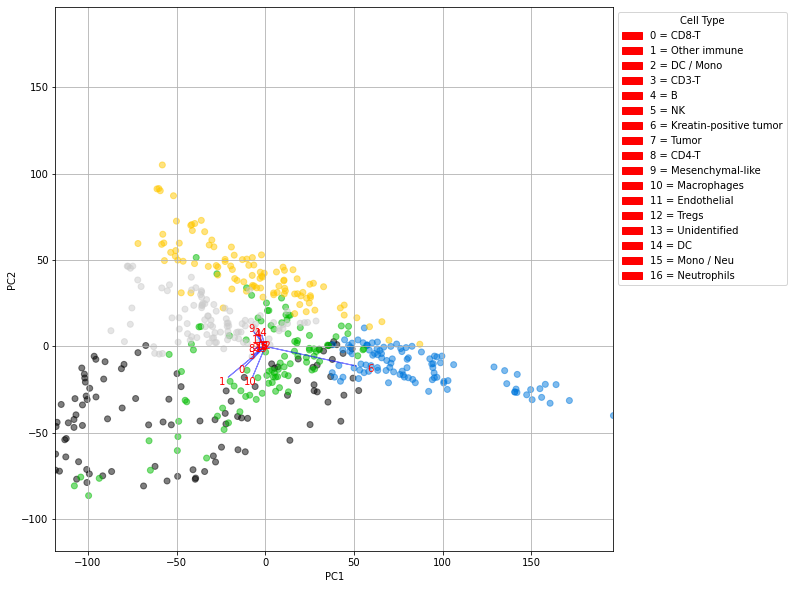

In [7]:
loadings = np.transpose(pca.components_[0:2, :])* np.sqrt(pca.explained_variance_[0:2])
biplot_PCA(pc[:,0:2], loadings, patients_ids, CELL_TYPES)

In [8]:
pca.components_

array([[-1.96216985e-01, -3.57016130e-01, -8.32678746e-02,
        -1.13516156e-01, -6.45243070e-02, -7.19952307e-03,
         8.72586606e-01, -4.30858752e-03, -1.14205372e-01,
        -1.17008477e-01, -1.23494606e-01, -5.79810563e-02,
        -3.04002724e-03, -3.27358789e-02, -3.33148617e-02,
        -2.21189716e-02, -2.34770724e-02],
       [-3.52880871e-01, -5.36681933e-01, -2.83147543e-02,
        -1.43919862e-01,  1.79970377e-01,  8.11611046e-03,
        -3.40524771e-01, -1.15605988e-02, -3.99731858e-02,
         2.69474391e-01, -5.40251236e-01,  9.56715957e-02,
         2.12163148e-03, -4.09631211e-02,  2.00654361e-01,
        -1.40996416e-02, -2.18192945e-03],
       [ 7.15189436e-01, -1.66088958e-01,  9.15207150e-02,
         1.32215938e-01,  1.12424435e-01,  1.97055221e-02,
         1.01829894e-01,  4.81671134e-03,  4.34735990e-01,
        -1.04053759e-01, -4.48667352e-01,  2.21866026e-03,
         8.45241398e-03, -5.03814763e-02, -3.62932557e-03,
        -3.38677593e-02, -8.2

0.82% Total Exp. Var.


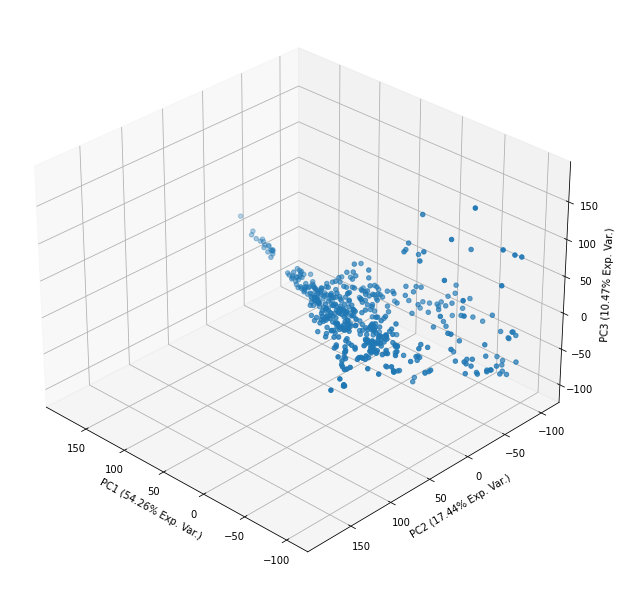

In [9]:
plot_3Dscatter_pca(pc, pca.explained_variance_ratio_, patients_ids)

In [13]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#full_patient_ids = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 20, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41]

N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../../output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patient_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

In [14]:
sites

array([[15, 17,  8, ...,  0,  0,  2],
       [ 2, 19,  3, ...,  0,  0,  0],
       [11, 17,  9, ...,  0,  0,  0],
       ...,
       [15, 16, 22, ...,  0, 22, 14],
       [40, 35, 24, ...,  0, 13,  9],
       [15, 24, 12, ...,  0, 12,  7]])

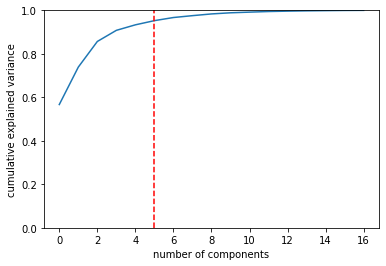

In [15]:
plot_cumulative_explained_variance(pca.explained_variance_ratio_)

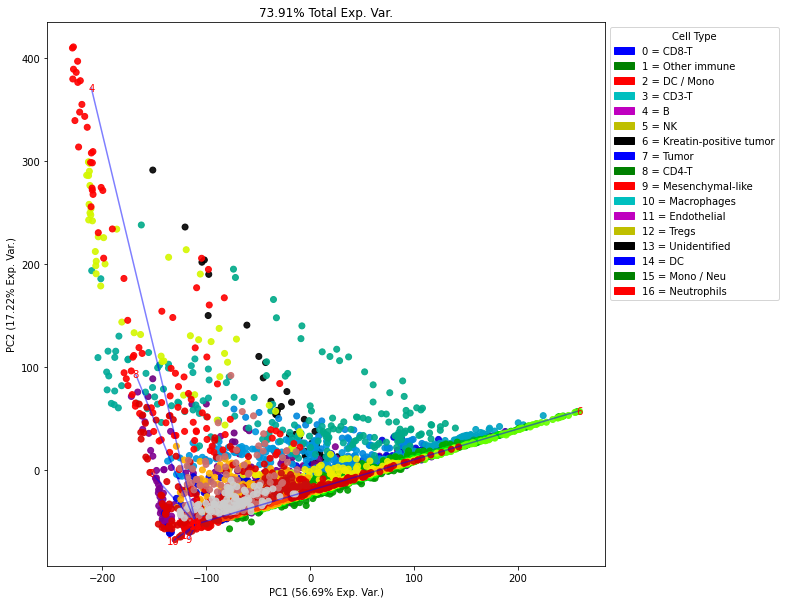

In [16]:
original_axis = np.zeros((18, 17))
np.fill_diagonal(original_axis, np.array(sites).max(0))
original_axis_pc = pca.transform(original_axis)
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patient_ids, original_axis=original_axis_pc, cell_type=CELL_TYPES)

0.86% Total Exp. Var.


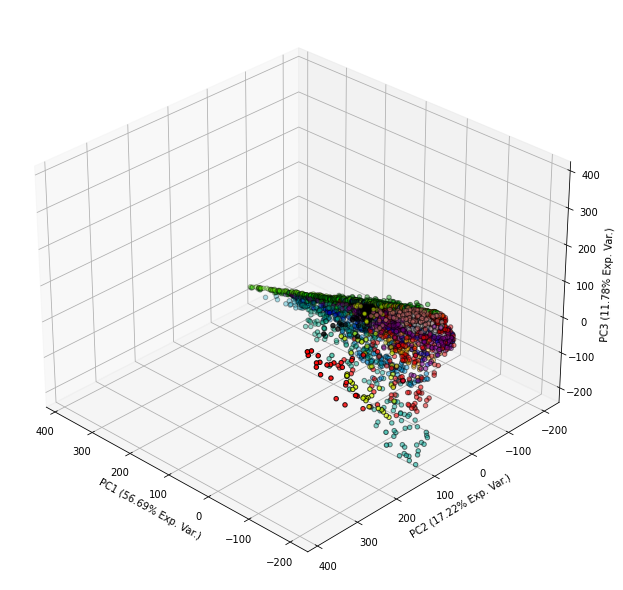

In [19]:
plot_3Dscatter_pca(pc, pca.explained_variance_ratio_, patient_ids)

In [16]:
pc

array([[  7.06217136,  52.41703981, -13.07750968, ...,  -2.78758045,
          6.14482922,   0.91818481],
       [ -9.08292864,  -6.23367254, -15.38013531, ...,  -0.9966509 ,
          2.81628408,   0.64213805],
       [-24.58355789,  -2.53445702, -20.43542113, ...,   1.27258037,
          2.13124969,   0.83569397],
       ...,
       [ 41.60576288, -33.97149523, -37.19384808, ...,   2.63078012,
          0.1696462 ,   0.44808956],
       [ 65.04139449, -33.80816597, -18.08755043, ...,  -0.08412208,
          1.46944719,   0.50072606],
       [ 30.37418812, -24.25452882, -15.84957396, ...,  -2.50697244,
          0.31541593,  -0.66865964]])

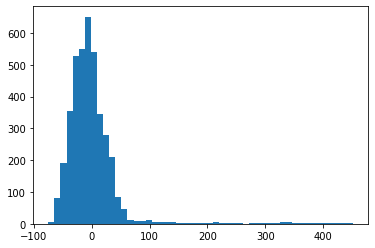

In [21]:
component = 1

plt.hist(pc[:, component], bins=50)
plt.show()